In [1]:
import numpy as np
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
planet = Planet('TITAN')
planet.loadAtmosphereModel('../../atmdata/Titan/titan-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 1000.0E3

# Set up a vehicle object
vehicle1=Vehicle('TitanOrbiter', 5700, 30, 0.0, 113.0, 0.0, 1.00, planet)
vehicle1.setInitialState(1000, -23.67, 14.89, 7.3384, 90.1226, -5.00, 0.0,0.0)
vehicle1.setSolverParams(1E-5)
vehicle1.setDragModulationVehicleParams(30, 4.14)

In [3]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(6000.0, 1.0, -50.0,-5.0, 1E-8, 1700.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(6000.0, 1.0, -50.0,-5.0, 1E-8,  1700.0)

print("Target apoapis: 1700 km")
print("----------------")
print(underShootLimit, exitflag_us)
print(overShootLimit,  exitflag_os)
print("----------------")

Target apoapis: 1700 km
----------------
-36.31230649712961 1.0
-34.425658770487644 1.0
----------------


In [4]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=50.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(1700, 1700, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 50.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(30, 4.14)

# Set vehicle initial state
vehicle1.setInitialState(1000, -23.67, 14.89, 7.3384, 90.1226, -35.0, 0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(0.5,1.0,1.0,6000.0)

In [5]:
import matplotlib.pyplot as plt

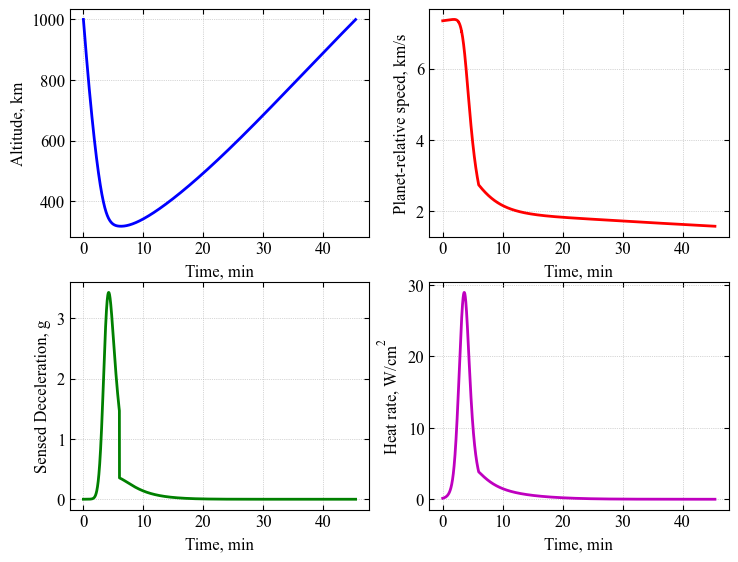

In [6]:
plt.figure(figsize=(8.5, 6.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.t_min_full, vehicle1.v_kms_full, 'r-', linewidth=2.0)
plt.ylabel('Planet-relative speed, km/s',fontsize=12)
plt.xlabel('Time, min',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)



plt.subplot(2, 2, 3)
plt.plot(vehicle1.t_min_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Sensed Deceleration, g',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle1.t_min_full, vehicle1.q_stag_total_full, 'm-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../../data/joaaa-titan-orbiter/nominal-trajectory.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/nominal-trajectory.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/nominal-trajectory.eps', dpi=300,bbox_inches='tight')

plt.show()

In [7]:
vehicle1.terminal_apoapsis

1734.0582621798646

In [8]:
vehicle1.terminal_periapsis

229.30590195736895

In [9]:
vehicle1.periapsis_raise_DV

158.86616062291523

In [10]:
from scipy import integrate

In [11]:
heatload = integrate.cumtrapz(vehicle1.q_stag_total_full, vehicle1.t_min_full*60, initial=0)

In [12]:
heatload[-1]/1e3

5.111547279952062

In [13]:
vehicle1.v_kms_full[0]

7.3384

In [14]:
vehicle1.v_kms_full[-1]

1.5807978416045192

In [15]:
vehicle1.v_kms_full[0] - vehicle1.v_kms_full[-1]

5.757602158395481

In [16]:
max(vehicle1.acc_net_g_full)

3.4279413487391053

In [17]:
max(vehicle1.q_stag_total_full)

28.976740110983588

In [18]:
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter

In [19]:
approach2 = Approach("TITAN", v_inf_vec_icrf_kms=np.array([-0.910, 5.081, 4.710]),
                            rp=(2575+1700)*1e3, psi=np.pi)

In [20]:
orbiter = PropulsiveOrbiter(approach=approach2, apoapsis_alt_km=1700)

In [21]:
orbiter.DV_OI_mag

5832.923148316219

In [22]:
def mf_m0(DV, Isp):
    return np.exp(-DV/(Isp*9.80665))

mf_m0(DV=5760, Isp=320)

0.15953544059364894

In [23]:
5700*0.159

906.3000000000001